In [2]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject


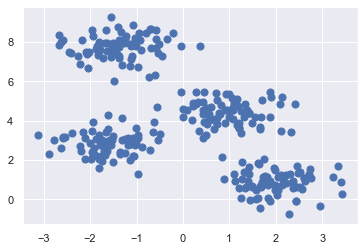

In [3]:
from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)

In [13]:
import tensorflow_hub as hub
import numpy as np
import tensorflow_text

# Some texts of different lengths.
english_sentences = ["I enjoy taking long walks along the beach with my dog."]
italian_sentences = ["Mi piace fare lunghe passeggiate lungo la spiaggia con il mio cane."]
japanese_sentences = ["私は犬と一緒にビーチを散歩するのが好きです"]

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder-multilingual-large/3")

# Compute embeddings.
en_result = embed(english_sentences)
it_result = embed(italian_sentences)
ja_result = embed(japanese_sentences)

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 80 from C header, got 96 from PyObject


In [63]:
#bible translations
en = ["The measures provided for in this Regulation are in accordance with the opinion of the Management Committee for Milk and Milk Products"]
it = ["Le misure previste dal presente regolamento sono conformi al parere del comitato di gestione per il latte e i prodotti lattiero-caseari"]
de = ["Die in dieser Verordnung vorgesehenen Maßnahmen entsprechen der Stellungnahme des Verwaltungsausschusses für Milch und Milcherzeugnisse"]
nl = ["De in deze verordening vervatte maatregelen zijn in overeenstemming met het advies van het Comité van beheer voor melk en zuivelproducten"]
pl = ["Środki przewidziane w niniejszym rozporządzeniu są zgodne z opinią Komitetu Zarządzającego ds. Mleka i Przetworów Mlecznych"]
fr = ["Les mesures prévues au présent règlement sont conformes à l'avis du comité de gestion du lait et des produits laitiers"]

en_result = embed(en)
it_result = embed(it)
de_result = embed(de)
nl_result = embed(nl)
pl_result = embed(pl)
fr_result = embed(fr)



In [64]:
enTest = np.array(en_result).reshape(512,)
itTest = np.array(it_result).reshape(512,)
deTest = np.array(de_result).reshape(512,)
nlTest = np.array(nl_result).reshape(512,)
plTest = np.array(pl_result).reshape(512,)
frTest = np.array(fr_result).reshape(512,)


# enTest = np.array([0, 1, 2, 3])
# itTest = [0, 1, 5, 3]
# jaTest = [0, 10, 2, 3]

In [74]:
langPoints = [[0, 1, 2, 3], [3, 4, 5, 3], [1, 4, 6, 3], [3, 0, 2, 3]]
langPoints2 = [enTest, itTest, deTest, nlTest, plTest, frTest]

In [75]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(langPoints2)
y_kmeans = kmeans.predict(langPoints2)

In [76]:
y_kmeans

array([0, 0, 0, 2, 1, 0])